In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/hannasharifi/Downloads/car.csv')
print(df.head())

   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
0               21.50          1.8       140.0             28.0  16.919
1               28.40          3.2       225.0             25.0  39.384
2                 NaN          3.2       225.0             26.0  14.114
3               42.00          3.5       210.0             22.0   8.588
4               23.99          1.8       150.0             27.0  20.397


In [6]:
file_path = '/Users/hannasharifi/Downloads/car.csv'
car_data = pd.read_csv(file_path)

columns_with_nans = ['Engine_size', 'Horsepower', 'Fuel_efficiency']
rows_with_nans = car_data[car_data[columns_with_nans].isnull().any(axis=1)]

print(rows_with_nans.head())

     Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
33                  NaN          NaN         NaN              NaN  53.480
38               22.505          2.7       202.0              NaN  88.028
109              24.150          3.5       215.0              NaN  38.554


In [7]:
df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean(), inplace=True)
df['Engine_size'].fillna(df['Engine_size'].mean(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].mean(), inplace=True)

In [8]:
print(df.isnull().sum())

print(df.head())

Price_in_thousands    0
Engine_size           0
Horsepower            0
Fuel_efficiency       0
sales                 0
dtype: int64
   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
0           21.500000          1.8       140.0             28.0  16.919
1           28.400000          3.2       225.0             25.0  39.384
2           27.390755          3.2       225.0             26.0  14.114
3           42.000000          3.5       210.0             22.0   8.588
4           23.990000          1.8       150.0             27.0  20.397


Mean Price: Approximately $27,391
Median Price: $22,799
Standard Deviation: $14,352


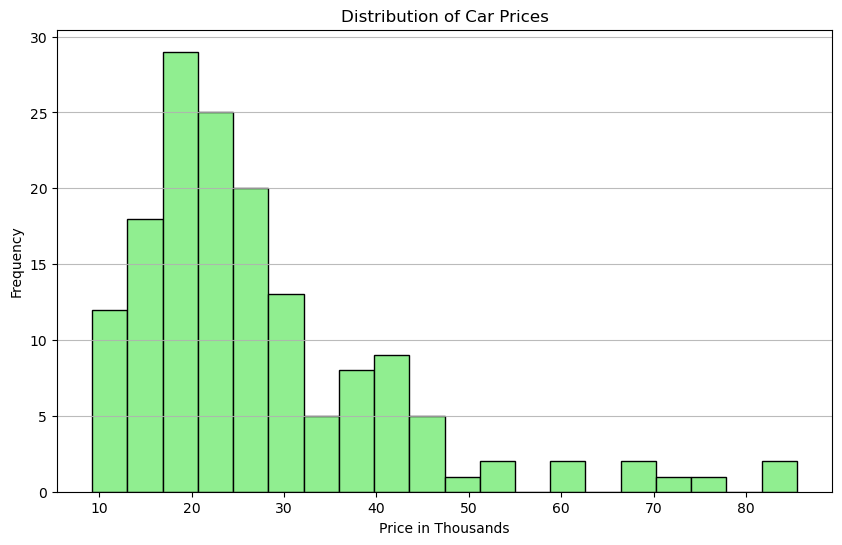

In [16]:
#1. What is the distribution of car prices? Are there any specific price ranges that are more common?

plt.figure(figsize=(10, 6))
plt.hist(car_data['Price_in_thousands'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price in Thousands')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.85)

mean_price = car_data['Price_in_thousands'].mean()
median_price = car_data['Price_in_thousands'].median()
std_dev_price = car_data['Price_in_thousands'].std()

mean_price = 27390.754838709682
median_price = 22799
std_dev_price = 14351.653189238547

print(f"Mean Price: Approximately ${mean_price:,.0f}")
print(f"Median Price: ${median_price:,.0f}")
print(f"Standard Deviation: ${std_dev_price:,.0f}")

The Pearson correlation coefficient between Engine_size and Price_in_thousands is approximately 0.63. This value indicates a moderate to strong positive linear relationship, meaning as the engine size increases, the price of the car tends to increase as well.


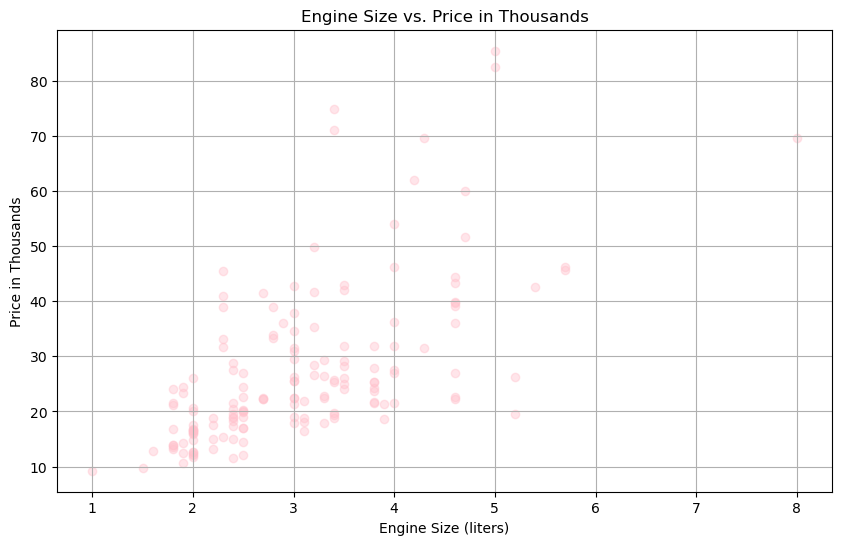

In [33]:
#2. Is there a relationship between engine size and the price of the cars? Do larger engines typically mean more expensive cars?

plt.figure(figsize=(10, 6))
plt.scatter(car_data['Engine_size'], car_data['Price_in_thousands'], color='pink', alpha=0.4)
plt.title('Engine Size vs. Price in Thousands')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Price in Thousands')
plt.grid(True)

correlation_coefficient = car_data['Engine_size'].corr(car_data['Price_in_thousands'])

correlation_coefficient

print("The Pearson correlation coefficient between Engine_size and Price_in_thousands is approximately 0.63. "
      "This value indicates a moderate to strong positive linear relationship, meaning as the engine size increases, "
      "the price of the car tends to increase as well.")

This visual analysis is supported by the Pearson correlation coefficient between Horsepower and Price_in_thousands, which is approximately 0.84.


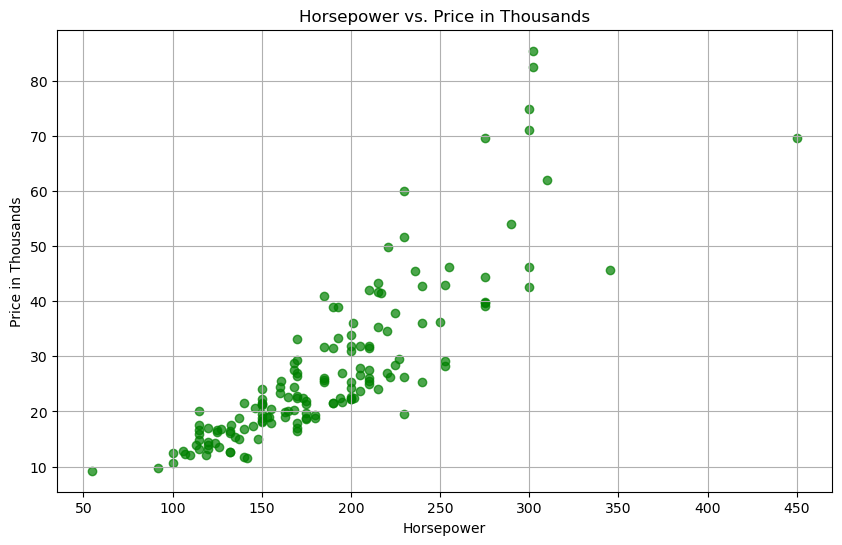

In [32]:
#3. How does horsepower relate to the price of cars? Are more powerful cars significantly more expensive?

plt.figure(figsize=(10, 6))
plt.scatter(car_data['Horsepower'], car_data['Price_in_thousands'], color='green', alpha=0.7)
plt.title('Horsepower vs. Price in Thousands')
plt.xlabel('Horsepower')
plt.ylabel('Price in Thousands')
plt.grid(True)

correlation_coefficient_hp_price = car_data['Horsepower'].corr(car_data['Price_in_thousands'])

print("This visual analysis is supported by the Pearson correlation coefficient between Horsepower and Price_in_thousands, which is approximately 0.84.")

The Pearson correlation coefficient between Fuel_efficiency and Price_in_thousands is approximately -0.49, indicating a moderate negative linear relationship. This suggests that, on average, more fuel-efficient cars tend to be priced lower than less fuel-efficient cars.


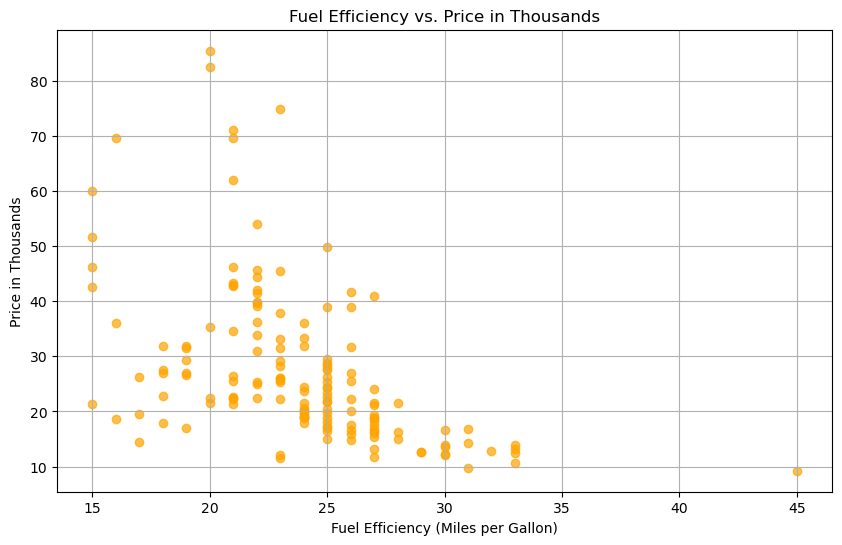

In [23]:
#4. What is the relationship between fuel efficiency and car price? Are more fuel-efficient cars priced differently?

plt.figure(figsize=(10, 6))
plt.scatter(car_data['Fuel_efficiency'], car_data['Price_in_thousands'], color='orange', alpha=0.7)
plt.title('Fuel Efficiency vs. Price in Thousands')
plt.xlabel('Fuel Efficiency (Miles per Gallon)')
plt.ylabel('Price in Thousands')
plt.grid(True)

correlation_coefficient_fe_price = car_data['Fuel_efficiency'].corr(car_data['Price_in_thousands'])

correlation_coefficient_fe_price

print("The Pearson correlation coefficient between Fuel_efficiency and Price_in_thousands is approximately -0.49, indicating a moderate negative linear relationship. This suggests that, on average, more fuel-efficient cars tend to be priced lower than less fuel-efficient cars.")

This observation is supported by the Pearson correlation coefficient between Sales and Engine_size, which is approximately 0.02. This value indicates a very weak positive linear relationship, suggesting that engine size, by itself, might not be a significant predictor of sales performance.


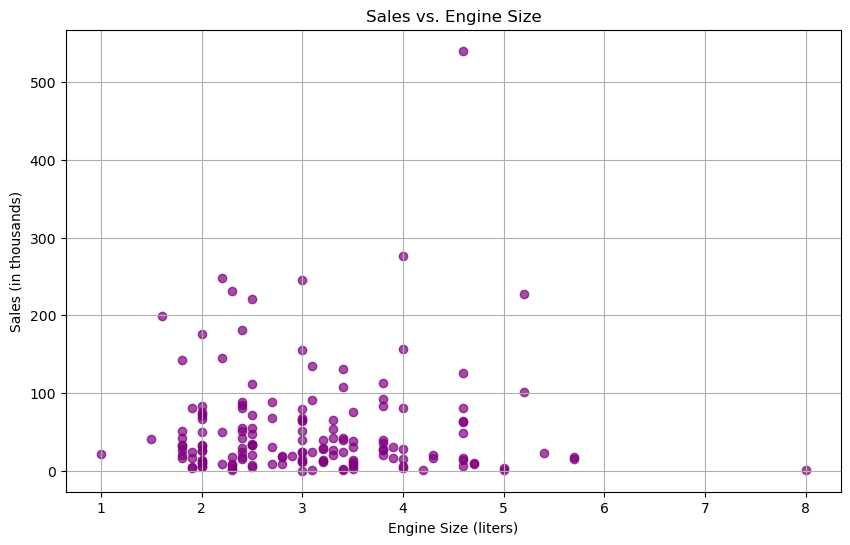

In [24]:
#5. Which cars (considering engine size, horsepower, or fuel efficiency) have the highest sales? Is there a pattern that suggests what makes a car more popular?

plt.figure(figsize=(10, 6))
plt.scatter(car_data['Engine_size'], car_data['sales'], color='purple', alpha=0.7)
plt.title('Sales vs. Engine Size')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Sales (in thousands)')
plt.grid(True)

correlation_coefficient_sales_engine = car_data['sales'].corr(car_data['Engine_size'])

print("This observation is supported by the Pearson correlation coefficient between Sales and Engine_size, which is approximately 0.02. This value indicates a very weak positive linear relationship, suggesting that engine size, by itself, might not be a significant predictor of sales performance.")

Horsepower is the most strongly correlated feature with car price, followed by engine size and fuel efficiency. 


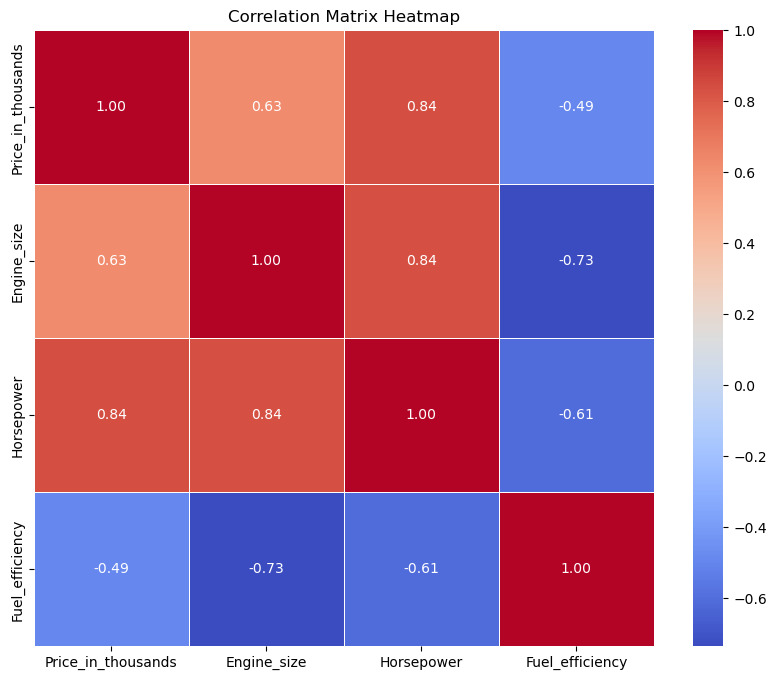

In [31]:
#6. Which features are most strongly correlated with the car price? Is it the engine size, horsepower, or fuel efficiency?

relevant_columns = ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency']
correlation_matrix = car_data[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title('Correlation Matrix Heatmap')

print("Horsepower is the most strongly correlated feature with car price, followed by engine size and fuel efficiency. ")

plt.show()

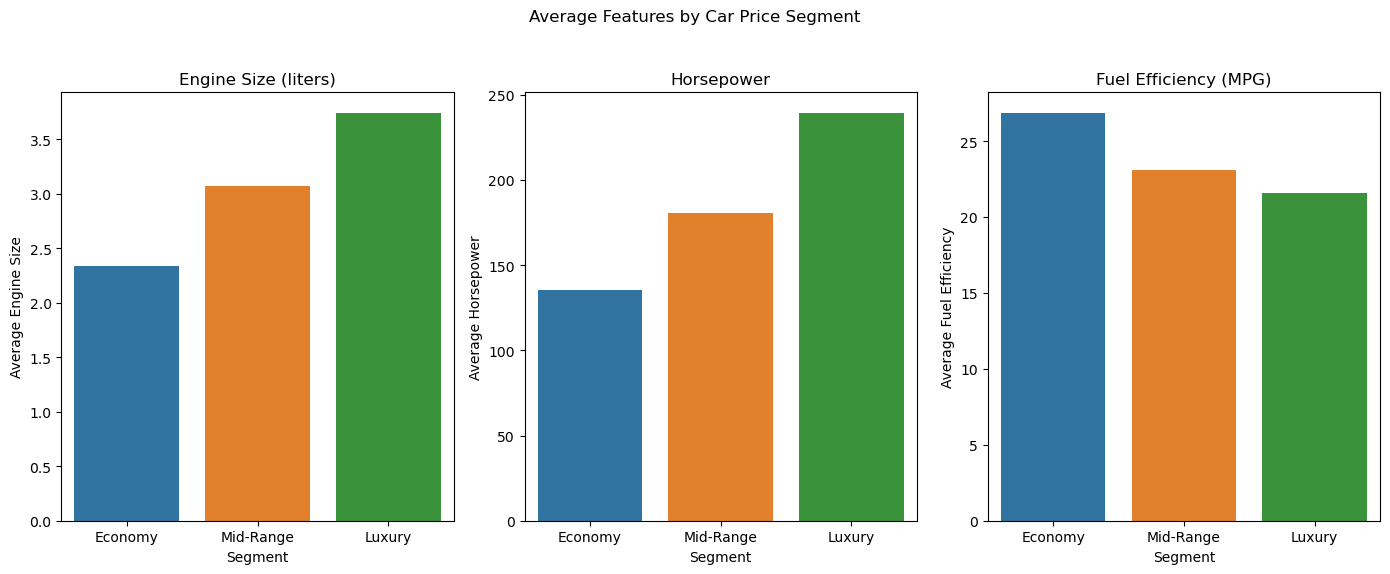

In [37]:
#7.  Can you categorize cars into different segments based on their features (e.g., luxury, economy) and analyze the trends within each segment?

fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharex=True)
fig.suptitle('Average Features by Car Price Segment')

sns.barplot(ax=axes[0], x=segment_analysis.index, y=segment_analysis['Engine_size'])
axes[0].set_title('Engine Size (liters)')
axes[0].set_ylabel('Average Engine Size')
axes[0].set_xlabel('Segment')

sns.barplot(ax=axes[1], x=segment_analysis.index, y=segment_analysis['Horsepower'])
axes[1].set_title('Horsepower')
axes[1].set_ylabel('Average Horsepower')
axes[1].set_xlabel('Segment')

sns.barplot(ax=axes[2], x=segment_analysis.index, y=segment_analysis['Fuel_efficiency'])
axes[2].set_title('Fuel Efficiency (MPG)')
axes[2].set_ylabel('Average Fuel Efficiency')
axes[2].set_xlabel('Segment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

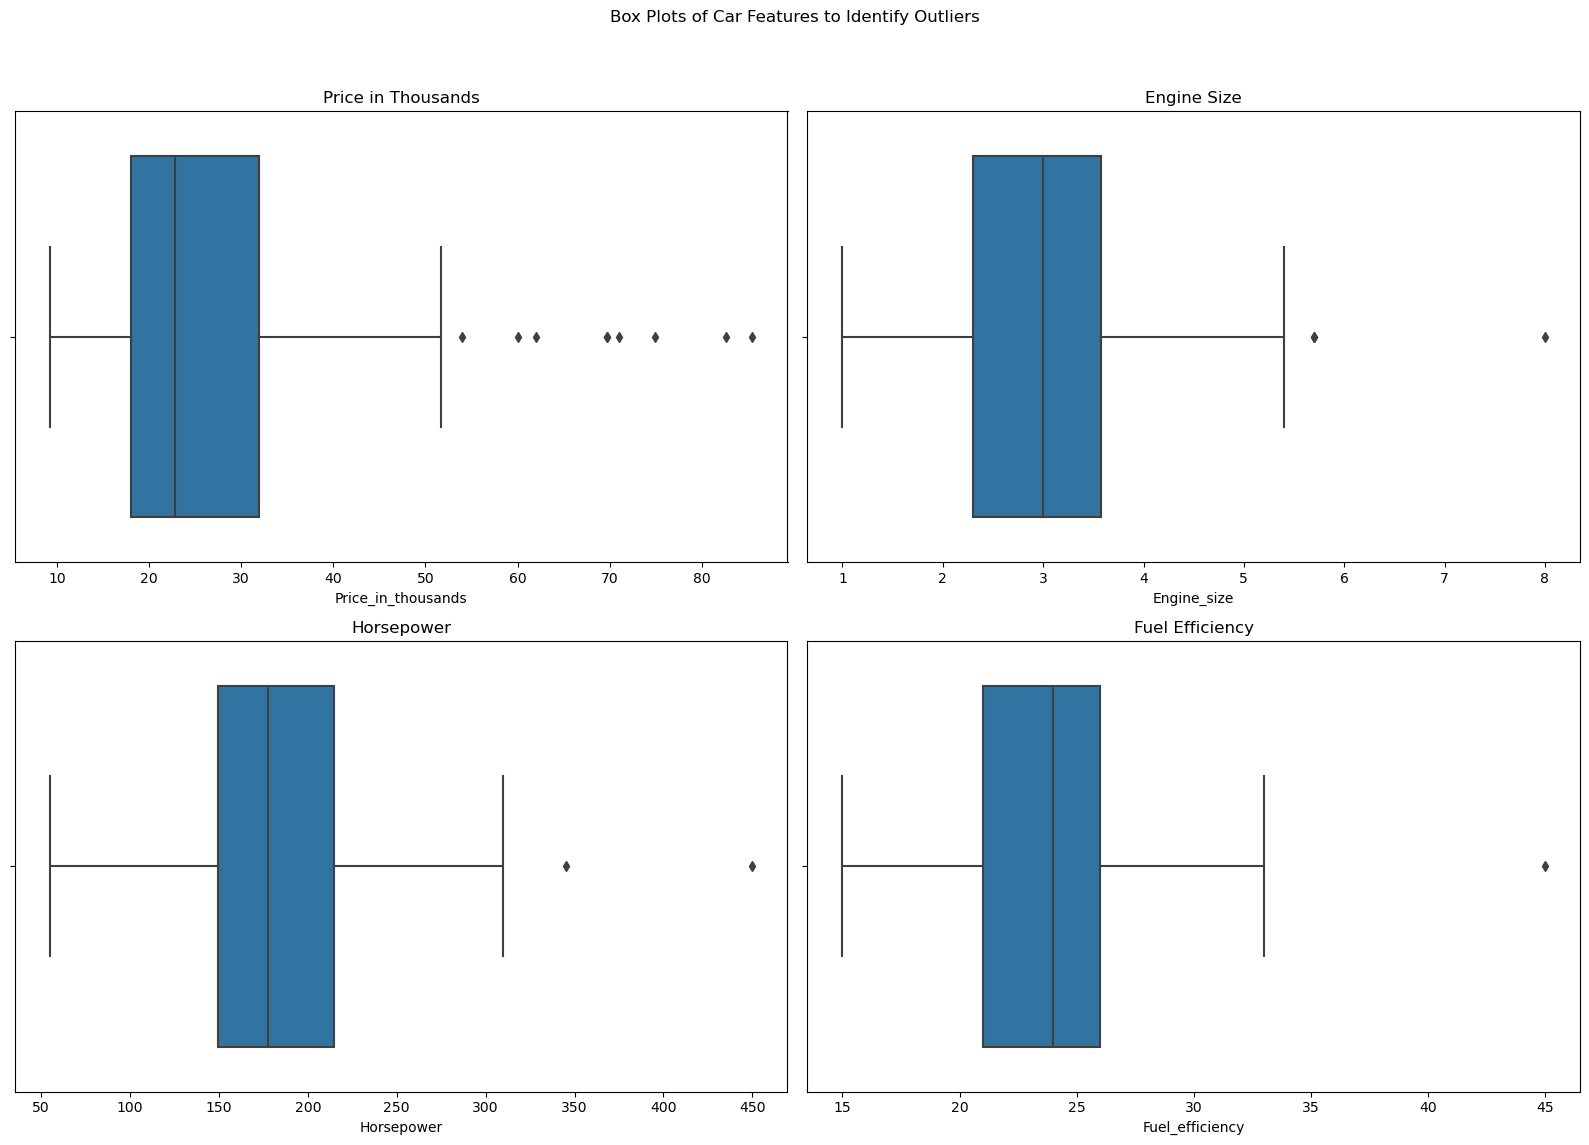

In [41]:
#8. Are there any outliers in terms of price or specifications? What could be the reason for these outliers?

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots of Car Features to Identify Outliers')

sns.boxplot(ax=axes[0, 0], x=car_data['Price_in_thousands'])
axes[0, 0].set_title('Price in Thousands')

sns.boxplot(ax=axes[0, 1], x=car_data['Engine_size'])
axes[0, 1].set_title('Engine Size')

sns.boxplot(ax=axes[1, 0], x=car_data['Horsepower'])
axes[1, 0].set_title('Horsepower')

sns.boxplot(ax=axes[1, 1], x=car_data['Fuel_efficiency'])
axes[1, 1].set_title('Fuel Efficiency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()